In [1]:
import pandas as pd
import numpy as np
import os
import json
import ast
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime, timedelta
from collections import defaultdict
from dtaidistance import dtw



In [2]:
master_activity_df = pd.read_csv("../data/buckets_combined/master_activity.csv")
# master_survey_df = pd.read_csv("../data/buckets_combined/master_survey.csv")
master_documents_df = pd.read_csv('../data/buckets_combined/master_docs_with_basic_formatting_0109.csv')

In [3]:
master_documents_df['task_id'].unique()

array(['ENG', 'ENG_1', 'ESP_2', 'ESP_1', 'ENG_2', 'ENG_No_LLM', 'ENG_LLM',
       'ESP_LLM', 'CONTROL_ENG'], dtype=object)

In [4]:
master_activity_df['activity_log'] = master_activity_df['activity_log'].apply(ast.literal_eval)


In [75]:
master_activity_df.shape

(96, 9)

In [77]:
master_activity_df['TASK_ID'].value_counts()

TASK_ID
ENG           16
ENG_1         16
ESP_2         16
ESP_1         16
ENG_2         16
ENG_No_LLM    16
Name: count, dtype: int64

In [8]:
donation_data = pd.read_csv('../output/donation_task_data_final.csv')
donation_data.head(1)

,PROLIFIC_PID,document_id,task_id,task_category,timestamp,donation_data,attentionCheck,charityFeedbackPositive,charityFeedbackNegative,adSource,adSourceReason,recipeUsed,EA1,EA2,EA3,IA1,IA2,IA3,BI1,BI2
0,607778a26ff3de83125f50c5,66c5a13c86c57a87db6f59d9,ENG,ENG,{'$date': '2024-09-04T18:46:18.789Z'},0.0,WWF,NaN,NaN,AS1,It seems generic.,['RU2'],1,1,1,4,3,3,2,2


In [9]:
donation_data['task_id'].value_counts()

task_id
ENG            80
ENG_1          80
ENG_2          80
ENG_No_LLM     80
ENG_LLM        80
CONTROL_ENG    80
ESP_2          64
ESP_1          64
ESP_LLM        57
Name: count, dtype: int64

In [10]:
master_activity_df

,_id,document_id,task_id,prolific_id,activity_log,time_spent_outside,timestamp,study_id,TASK_ID
0,66c5a24c86c57a87db6f59e3,66c5a13c86c57a87db6f59d9,main_task_1,5a4ff22bacc75b000179b0e9,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-21 08:16:12.414000+00:00,66c516b1d61c7b572205f713,ENG
1,66c5e8072f44d7b54f76e537,66c5e4be2f44d7b54f76e52d,main_task_1,5c068f1f9d0df40001e5688c,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-21 13:13:43.830000+00:00,66c516b1d61c7b572205f713,ENG
2,66c5a2ec86c57a87db6f59ed,66c5a21086c57a87db6f59e1,main_task_1,5c62de3f48fe4e000180e09d,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-21 08:18:52.061000+00:00,66c516b1d61c7b572205f713,ENG
3,66c88800e46942c099b32394,66c88773e46942c099b32393,main_task_1,5d1f9776676cd1001580ae9c,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-23 13:00:48.591000+00:00,66c516b1d61c7b572205f713,ENG
4,66c5a5c486c57a87db6f5a00,66c5a3e386c57a87db6f59f9,main_task_1,5ea9a41b87b4150bf9634637,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-21 08:31:00.305000+00:00,66c516b1d61c7b572205f713,ENG
...,...,...,...,...,...,...,...,...,...
91,66c9e020925382be577189bb,66c9dc59925382be577189b5,main_task_1,60897f81d4a682307c628739,"{'buttonClicks': [], 'generatedContent': [], '...",12800,2024-08-24 13:29:04.194000+00:00,66c90fcc4541f87369be0127,ENG_No_LLM
92,66c9e04f925382be577189be,66c9dbe4925382be577189af,main_task_1,66a3b18c58afbaf406f6ed4a,"{'buttonClicks': [], 'generatedContent': [], '...",12560,2024-08-24 13:29:51.324000+00:00,66c90fcc4541f87369be0127,ENG_No_LLM
93,66c9e11b925382be577189c1,66c9da27925382be5771899c,main_task_1,6676842beee8713bc1b33408,"{'buttonClicks': [], 'generatedContent': [], '...",12750,2024-08-24 13:33:15.492000+00:00,66c90fcc4541f87369be0127,ENG_No_LLM
94,66c9f25b925382be577189c9,66c9f03a925382be577189c6,main_task_1,5efc4a5bed804f20d1c1b0f4,"{'buttonClicks': [], 'generatedContent': [], '...",0,2024-08-24 14:46:51.777000+00:00,66c90fcc4541f87369be0127,ENG_No_LLM


In [11]:
key_logs = master_activity_df.copy(deep=True)
key_logs['key_logs'] = master_activity_df['activity_log'].apply(lambda x:x['keyLogs'])
key_logs.head(2)

,_id,document_id,task_id,prolific_id,activity_log,time_spent_outside,timestamp,study_id,TASK_ID,key_logs
0,66c5a24c86c57a87db6f59e3,66c5a13c86c57a87db6f59d9,main_task_1,5a4ff22bacc75b000179b0e9,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-21 08:16:12.414000+00:00,66c516b1d61c7b572205f713,ENG,"[{'key': 'Shift', 'timestamp': '2024-08-21T08:..."
1,66c5e8072f44d7b54f76e537,66c5e4be2f44d7b54f76e52d,main_task_1,5c068f1f9d0df40001e5688c,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-21 13:13:43.830000+00:00,66c516b1d61c7b572205f713,ENG,"[{'key': 'Backspace', 'timestamp': '2024-08-21..."


In [12]:
key_logs['generated_content'] = master_activity_df['activity_log'].apply(lambda x:x['generatedContent'])

In [13]:
rows = []

# Iterate over each document and its sorted events
for _, row in key_logs.iterrows():
    doc_id = row['document_id']
    task_id = row['TASK_ID']
    key_strokes = row['key_logs']
    feature_usg = row['generated_content']
    
    # Collect all key press events for the document
    for stroke in key_strokes:
        rows.append({
            'doc_id': doc_id,
            'task_id': task_id,
            'event_type': 'key',
            'content': stroke['key'],
            'timestamp': datetime.fromisoformat(stroke['timestamp'].replace('Z', '+00:00'))
        })
    
    # Collect all feature usage events for the document
    for content in feature_usg:
        rows.append({
            'doc_id': doc_id,
            'task_id': task_id,
            'event_type': content['feature'] if 'feature' in content else 'custom',
            'content': content['response'],
            'timestamp': datetime.fromisoformat(content['timestamp'].replace('Z', '+00:00'))
        })

# Convert the list of rows into a DataFrame
keylog_df = pd.DataFrame(rows)

# Sort the DataFrame by document ID and timestamp to ensure the order is correct
keylog_df.sort_values(by=['doc_id', 'timestamp'], inplace=True)
keylog_df.reset_index(drop=True, inplace=True)


In [14]:
outside_standard_recipe = ['Be More Emotional', 'newly created recipe', 'Be More Emotional', 'Summary: ADD STATISTICS', 'Emotional Manipulation']
keylog_df['event_type'] = keylog_df['event_type'].apply(lambda x: x if x not in outside_standard_recipe else 'custom')

In [15]:
keylog_df['consolidated_actions'] = np.where(keylog_df['event_type'] == 'key', keylog_df['content'], keylog_df['event_type'])
keylog_df = keylog_df[keylog_df['consolidated_actions']!='Unidentified']

In [16]:

key_logs['combined_logs'] = key_logs.apply(lambda x: x['key_logs'] + x['generated_content'], axis=1)
key_logs

,_id,document_id,task_id,prolific_id,activity_log,time_spent_outside,timestamp,study_id,TASK_ID,key_logs,generated_content,combined_logs
0,66c5a24c86c57a87db6f59e3,66c5a13c86c57a87db6f59d9,main_task_1,5a4ff22bacc75b000179b0e9,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-21 08:16:12.414000+00:00,66c516b1d61c7b572205f713,ENG,"[{'key': 'Shift', 'timestamp': '2024-08-21T08:...","[{'feature': '@ai generation', 'prompt': 'writ...","[{'key': 'Shift', 'timestamp': '2024-08-21T08:..."
1,66c5e8072f44d7b54f76e537,66c5e4be2f44d7b54f76e52d,main_task_1,5c068f1f9d0df40001e5688c,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-21 13:13:43.830000+00:00,66c516b1d61c7b572205f713,ENG,"[{'key': 'Backspace', 'timestamp': '2024-08-21...",[{'feature': 'Cautionary Narrative with Statis...,"[{'key': 'Backspace', 'timestamp': '2024-08-21..."
2,66c5a2ec86c57a87db6f59ed,66c5a21086c57a87db6f59e1,main_task_1,5c62de3f48fe4e000180e09d,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-21 08:18:52.061000+00:00,66c516b1d61c7b572205f713,ENG,"[{'key': 'Shift', 'timestamp': '2024-08-21T08:...","[{'feature': '@ai generation', 'prompt': 'plea...","[{'key': 'Shift', 'timestamp': '2024-08-21T08:..."
3,66c88800e46942c099b32394,66c88773e46942c099b32393,main_task_1,5d1f9776676cd1001580ae9c,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-23 13:00:48.591000+00:00,66c516b1d61c7b572205f713,ENG,"[{'key': 'Control', 'timestamp': '2024-08-23T1...","[{'feature': '@ai generation', 'prompt': 'use ...","[{'key': 'Control', 'timestamp': '2024-08-23T1..."
4,66c5a5c486c57a87db6f5a00,66c5a3e386c57a87db6f59f9,main_task_1,5ea9a41b87b4150bf9634637,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-21 08:31:00.305000+00:00,66c516b1d61c7b572205f713,ENG,"[{'key': 'Enter', 'timestamp': '2024-08-21T08:...","[{'feature': '@ai generation', 'prompt': ' ﻿Wr...","[{'key': 'Enter', 'timestamp': '2024-08-21T08:..."
...,...,...,...,...,...,...,...,...,...,...,...,...
91,66c9e020925382be577189bb,66c9dc59925382be577189b5,main_task_1,60897f81d4a682307c628739,"{'buttonClicks': [], 'generatedContent': [], '...",12800,2024-08-24 13:29:04.194000+00:00,66c90fcc4541f87369be0127,ENG_No_LLM,"[{'key': 'Backspace', 'timestamp': '2024-08-24...",[],"[{'key': 'Backspace', 'timestamp': '2024-08-24..."
92,66c9e04f925382be577189be,66c9dbe4925382be577189af,main_task_1,66a3b18c58afbaf406f6ed4a,"{'buttonClicks': [], 'generatedContent': [], '...",12560,2024-08-24 13:29:51.324000+00:00,66c90fcc4541f87369be0127,ENG_No_LLM,"[{'key': 'Backspace', 'timestamp': '2024-08-24...",[],"[{'key': 'Backspace', 'timestamp': '2024-08-24..."
93,66c9e11b925382be577189c1,66c9da27925382be5771899c,main_task_1,6676842beee8713bc1b33408,"{'buttonClicks': [], 'generatedContent': [], '...",12750,2024-08-24 13:33:15.492000+00:00,66c90fcc4541f87369be0127,ENG_No_LLM,"[{'key': 'Backspace', 'timestamp': '2024-08-24...",[],"[{'key': 'Backspace', 'timestamp': '2024-08-24..."
94,66c9f25b925382be577189c9,66c9f03a925382be577189c6,main_task_1,5efc4a5bed804f20d1c1b0f4,"{'buttonClicks': [], 'generatedContent': [], '...",0,2024-08-24 14:46:51.777000+00:00,66c90fcc4541f87369be0127,ENG_No_LLM,"[{'key': 'CapsLock', 'timestamp': '2024-08-24T...",[],"[{'key': 'CapsLock', 'timestamp': '2024-08-24T..."


In [17]:
keylog_df.rename(columns={'doc_id':'document_id'}, inplace=True)

In [20]:
def ensure_feature_key(content_list):
    for content in content_list:
        if 'feature' not in content:
            content['feature'] = 'custom_recipe'
        if 'feature' in content and content['feature'] in outside_standard_recipe:
            content['feature'] = 'custom_recipe'
    return content_list

# Apply the function to the 'generated_content' column
key_logs['generated_content'] = key_logs['generated_content'].apply(ensure_feature_key)


In [117]:
keylog_df.to_csv('../output/consolidated_actions.csv', index=False)

In [21]:
key_logs['combined_logs_sorted'] = key_logs['combined_logs'].apply(
    lambda logs: sorted(logs, key=lambda x: x['timestamp'])
)

In [ ]:
doc_sequences = keylog_df.groupby('document_id')['consolidated_actions'].apply(list).reset_index()

# Step 2: Join the task_id information (assuming it's constant for each doc_id)
doc_sequences = doc_sequences.merge(keylog_df[['document_id', 'task_id']].drop_duplicates(), on='document_id')

# Display the action sequences for each doc_id


In [25]:
master_list = doc_sequences.merge(donation_data, on='document_id', how='inner')

In [70]:
unique_actions = keylog_df['consolidated_actions'].unique()

# Initialize OneHotEncoder and fit it on unique actions
encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False returns dense arrays
one_hot_encoded = encoder.fit_transform(unique_actions.reshape(-1, 1))

# Create a mapping from action to one-hot encoding for easier lookup
action_to_onehot_map = {action: one_hot for action, one_hot in zip(unique_actions, one_hot_encoded)}

# Step 4: Apply the one-hot encoding to each action in the 'consolidated_actions' sequences
# This will replace each action with its corresponding one-hot encoded vector
doc_sequences['encoded_sequence'] = doc_sequences['consolidated_actions'].apply(
    lambda actions: np.array([action_to_onehot_map[action] for action in actions])
)

# Check the first few rows to ensure that sequences are encoded properly
print(doc_sequences[['document_id', 'encoded_sequence']].head())

                document_id                                   encoded_sequence
0  66c522869236da2225cc8cf2  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
1  66c5241b9236da2225cc8cfa  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
2  66c524a69236da2225cc8cfd  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
3  66c5a13c86c57a87db6f59d9  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
4  66c5a21086c57a87db6f59e1  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...


In [73]:
# Step 5: Function to flatten each one-hot encoded sequence (since DTW expects scalar sequences)
def flatten_onehot_sequence(onehot_sequence):
    # Flatten each list of one-hot vectors into a single long vector
    return np.concatenate(onehot_sequence)

# Apply the flattening to the one-hot encoded sequences for all documents
doc_sequences['flattened_encoded_sequence'] = doc_sequences['encoded_sequence'].apply(flatten_onehot_sequence)

# Extract the flattened sequences for ENG and ESP task_ids
eng_sequences_flattened = doc_sequences[doc_sequences['task_id'] == 'ENG']['flattened_encoded_sequence'].tolist()
esp_sequences_flattened = doc_sequences[doc_sequences['task_id'] == 'ESP']['flattened_encoded_sequence'].tolist()

# Print the first few flattened sequences for verification
print(doc_sequences[['document_id', 'flattened_encoded_sequence']].head())


                document_id                         flattened_encoded_sequence
0  66c522869236da2225cc8cf2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1  66c5241b9236da2225cc8cfa  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2  66c524a69236da2225cc8cfd  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3  66c5a13c86c57a87db6f59d9  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4  66c5a21086c57a87db6f59e1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...


In [79]:
doc_sequences.shape

(96, 5)

In [80]:
unique_actions = keylog_df['consolidated_actions'].unique()

action_map = {action: idx for idx, action in enumerate(unique_actions)}

doc_sequences['encoded_sequence'] = doc_sequences['consolidated_actions'].apply(lambda actions: [action_map[action] for action in actions])

In [81]:
distance_matrix = dtw.distance_matrix(doc_sequences['encoded_sequence'].tolist())

In [83]:
from sklearn.cluster import AgglomerativeClustering


In [86]:
clustering_all = AgglomerativeClustering(n_clusters=3, linkage='complete')
labels_all = clustering_all.fit_predict(distance_matrix)

# Add the cluster labels to the original DataFrame
doc_sequences['cluster'] = labels_all

# Display the sequences with their cluster labels
print(doc_sequences[['document_id', 'task_id', 'cluster']])

                 document_id task_id  cluster
0   66c522869236da2225cc8cf2     ENG        0
1   66c5241b9236da2225cc8cfa     ENG        0
2   66c524a69236da2225cc8cfd     ENG        0
3   66c5a13c86c57a87db6f59d9     ENG        0
4   66c5a21086c57a87db6f59e1     ENG        0
..                       ...     ...      ...
91  66d3c7e95a434c9ed85a6847   ENG_2        0
92  66d3c85f5a434c9ed85a684b   ESP_1        0
93  66d3c8af5a434c9ed85a684e   ENG_2        0
94  66d3c8b05a434c9ed85a684f   ENG_2        0
95  66d3ca8a5a434c9ed85a685a   ENG_2        0

[96 rows x 3 columns]


c:\Users\shrey\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:586: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


Task distribution across clusters:
task_id  ENG  ENG_1  ENG_2  ENG_No_LLM  ESP_1  ESP_2
cluster                                             
0         14     13     15          10     13     11
1          0      1      0           1      2      1
2          2      2      1           5      1      4


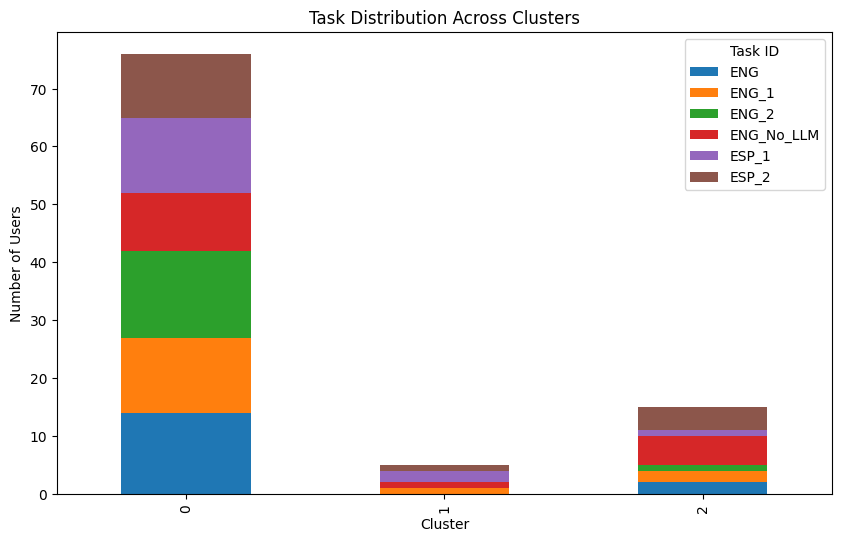

In [87]:
# Group by cluster and task_id to see how the task_ids are distributed across clusters
task_distribution = doc_sequences.groupby(['cluster', 'task_id']).size().unstack(fill_value=0)

print("Task distribution across clusters:")
print(task_distribution)

# Visualize the task distribution across clusters
task_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Task Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Users')
plt.legend(title='Task ID')
plt.show()


In [88]:
master_list

,document_id,consolidated_actions,task_id_x,PROLIFIC_PID,task_id_y,task_category,timestamp,donation_data,attentionCheck,charityFeedbackPositive,...,adSourceReason,recipeUsed,EA1,EA2,EA3,IA1,IA2,IA3,BI1,BI2
0,66c522869236da2225cc8cf2,"[Shift, @, a, i, , w, r, i, t, e, , m, e, ,...",ENG,611087db754dae727592763b,ENG,ENG,{'$date': '2024-09-04T21:13:46.888Z'},1.5,WWF,I liked that it pointed out examples of wildli...,...,"The unnatural asterisks added, as well as, the...","['RU6', 'RU2']",4,5,3,4,4,3,3,4
1,66c522869236da2225cc8cf2,"[Shift, @, a, i, , w, r, i, t, e, , m, e, ,...",ENG,66687940b6066d0b32735285,ENG,ENG,{'$date': '2024-09-04T22:49:04.32Z'},1.0,WWF,I like that it talks about what the organizati...,...,I don't think AI would come up with something ...,['RU6'],4,4,4,4,4,3,3,3
2,66c522869236da2225cc8cf2,"[Shift, @, a, i, , w, r, i, t, e, , m, e, ,...",ENG,60ff4947f329136761a45103,ENG,ENG,{'$date': '2024-09-04T22:56:00.452Z'},0.5,WWF,"I love the idea of helping things in need, whe...",...,"There’s a lot of passion in the ad, I don’t th...",['RU5'],4,5,5,5,5,5,5,4
3,66c522869236da2225cc8cf2,"[Shift, @, a, i, , w, r, i, t, e, , m, e, ,...",ENG,66c35f5caa40f6de28800d89,ENG,ENG,{'$date': '2024-09-04T23:16:31.111Z'},1.5,WWF,I like that this is a charity dedicated to fee...,...,It was very plainly and simply written,['RU5'],2,5,3,1,3,2,3,4
4,66c522869236da2225cc8cf2,"[Shift, @, a, i, , w, r, i, t, e, , m, e, ,...",ENG,5ef9302c07b0e310918662c3,ENG,ENG,{'$date': '2024-09-05T10:51:42.295Z'},1.5,WWF,I think you posted a draft. Two charities are ...,...,I think the longer WWF paragraph seems more hu...,['RU2'],4,4,4,3,3,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,66d3ca8a5a434c9ed85a685a,"[Backspace, Control, v, Emphasis on Immediate ...",ENG_2,6689b775decbc522030ddc73,ENG_2,ENG,{'$date': '2024-09-04T22:39:01.971Z'},1.0,WWF,Stating that a donation would make a difference.,...,Too many adjectives.,['RU5'],5,5,5,2,2,2,3,4
444,66d3ca8a5a434c9ed85a685a,"[Backspace, Control, v, Emphasis on Immediate ...",ENG_2,5e648efca8c76520c918bb31,ENG_2,ENG,{'$date': '2024-09-04T22:44:14.932Z'},0.0,WWF,NaN,...,It seems vague enough that an AI LLM could wri...,['RU5'],3,4,3,3,3,3,2,2
445,66d3ca8a5a434c9ed85a685a,"[Backspace, Control, v, Emphasis on Immediate ...",ENG_2,61118b5fd788969295997051,ENG_2,ENG,{'$date': '2024-09-04T23:07:33.029Z'},1.5,WWF,NaN,...,AI tends to overuse flourishing language like ...,"['RU5', 'RU6']",4,5,5,2,2,3,2,4
446,66d3ca8a5a434c9ed85a685a,"[Backspace, Control, v, Emphasis on Immediate ...",ENG_2,6417dfab27377aff2c54af66,ENG_2,ENG,{'$date': '2024-09-04T23:18:47.327Z'},0.8,WWF,Those ads need to have pictures or videos. I'...,...,"Could be either, I just guessed",['RU7'],2,3,2,3,2,2,2,2


In [89]:
clustered_outcomes = doc_sequences[['document_id', 'cluster']].merge(master_list, on='document_id')


In [90]:
clustered_outcomes

,document_id,cluster,consolidated_actions,task_id_x,PROLIFIC_PID,task_id_y,task_category,timestamp,donation_data,attentionCheck,...,adSourceReason,recipeUsed,EA1,EA2,EA3,IA1,IA2,IA3,BI1,BI2
0,66c522869236da2225cc8cf2,0,"[Shift, @, a, i, , w, r, i, t, e, , m, e, ,...",ENG,611087db754dae727592763b,ENG,ENG,{'$date': '2024-09-04T21:13:46.888Z'},1.5,WWF,...,"The unnatural asterisks added, as well as, the...","['RU6', 'RU2']",4,5,3,4,4,3,3,4
1,66c522869236da2225cc8cf2,0,"[Shift, @, a, i, , w, r, i, t, e, , m, e, ,...",ENG,66687940b6066d0b32735285,ENG,ENG,{'$date': '2024-09-04T22:49:04.32Z'},1.0,WWF,...,I don't think AI would come up with something ...,['RU6'],4,4,4,4,4,3,3,3
2,66c522869236da2225cc8cf2,0,"[Shift, @, a, i, , w, r, i, t, e, , m, e, ,...",ENG,60ff4947f329136761a45103,ENG,ENG,{'$date': '2024-09-04T22:56:00.452Z'},0.5,WWF,...,"There’s a lot of passion in the ad, I don’t th...",['RU5'],4,5,5,5,5,5,5,4
3,66c522869236da2225cc8cf2,0,"[Shift, @, a, i, , w, r, i, t, e, , m, e, ,...",ENG,66c35f5caa40f6de28800d89,ENG,ENG,{'$date': '2024-09-04T23:16:31.111Z'},1.5,WWF,...,It was very plainly and simply written,['RU5'],2,5,3,1,3,2,3,4
4,66c522869236da2225cc8cf2,0,"[Shift, @, a, i, , w, r, i, t, e, , m, e, ,...",ENG,5ef9302c07b0e310918662c3,ENG,ENG,{'$date': '2024-09-05T10:51:42.295Z'},1.5,WWF,...,I think the longer WWF paragraph seems more hu...,['RU2'],4,4,4,3,3,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,66d3ca8a5a434c9ed85a685a,0,"[Backspace, Control, v, Emphasis on Immediate ...",ENG_2,6689b775decbc522030ddc73,ENG_2,ENG,{'$date': '2024-09-04T22:39:01.971Z'},1.0,WWF,...,Too many adjectives.,['RU5'],5,5,5,2,2,2,3,4
444,66d3ca8a5a434c9ed85a685a,0,"[Backspace, Control, v, Emphasis on Immediate ...",ENG_2,5e648efca8c76520c918bb31,ENG_2,ENG,{'$date': '2024-09-04T22:44:14.932Z'},0.0,WWF,...,It seems vague enough that an AI LLM could wri...,['RU5'],3,4,3,3,3,3,2,2
445,66d3ca8a5a434c9ed85a685a,0,"[Backspace, Control, v, Emphasis on Immediate ...",ENG_2,61118b5fd788969295997051,ENG_2,ENG,{'$date': '2024-09-04T23:07:33.029Z'},1.5,WWF,...,AI tends to overuse flourishing language like ...,"['RU5', 'RU6']",4,5,5,2,2,3,2,4
446,66d3ca8a5a434c9ed85a685a,0,"[Backspace, Control, v, Emphasis on Immediate ...",ENG_2,6417dfab27377aff2c54af66,ENG_2,ENG,{'$date': '2024-09-04T23:18:47.327Z'},0.8,WWF,...,"Could be either, I just guessed",['RU7'],2,3,2,3,2,2,2,2


In [92]:
cluster_summary = clustered_outcomes.groupby('cluster')[['donation_data']].mean()
cluster_summary

,donation_data
cluster,
0,0.720787
1,0.659091
2,0.727143


Outcome summary by cluster:
         donation_data
cluster               
0             0.720787
1             0.659091
2             0.727143


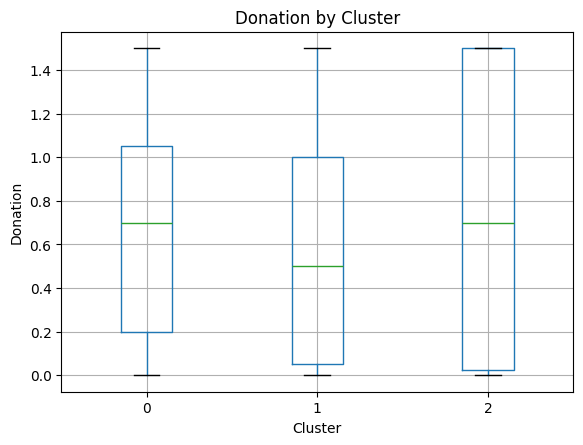

In [94]:

# Compare outcomes (utility, donation) by cluster

print("Outcome summary by cluster:")
print(cluster_summary)

# Visualize the difference in outcomes by cluster
clustered_outcomes.boxplot(column='donation_data', by='cluster')
plt.title("Donation by Cluster")
plt.suptitle("")
plt.xlabel("Cluster")
plt.ylabel("Donation")
plt.show()

In [96]:
eng1_sequences = doc_sequences[doc_sequences['task_id'] == 'ENG_1']['encoded_sequence'].tolist()
eng2_sequences = doc_sequences[doc_sequences['task_id'] == 'ENG_2']['encoded_sequence'].tolist()

# Compute the DTW distance matrix for ENG and ESP sequences (separately or combined)
distance_matrix_eng1 = dtw.distance_matrix(eng1_sequences)
distance_matrix_eng2 = dtw.distance_matrix(eng2_sequences)

# You can now use these distance matrices for clustering or further analysis
# print("DTW Distance Matrix for ENG Sequences:")
# print(distance_matrix_eng)

In [98]:
clustering_eng1 = AgglomerativeClustering(n_clusters=2, linkage='complete')
labels_eng1 = clustering_eng1.fit_predict(distance_matrix_eng1)

# Perform Hierarchical Clustering (Agglomerative) based on DTW distance matrix for ESP sequences
clustering_eng2 = AgglomerativeClustering(n_clusters=2, linkage='complete')
labels_eng2 = clustering_eng2.fit_predict(distance_matrix_eng2)



c:\Users\shrey\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:586: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
c:\Users\shrey\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:586: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


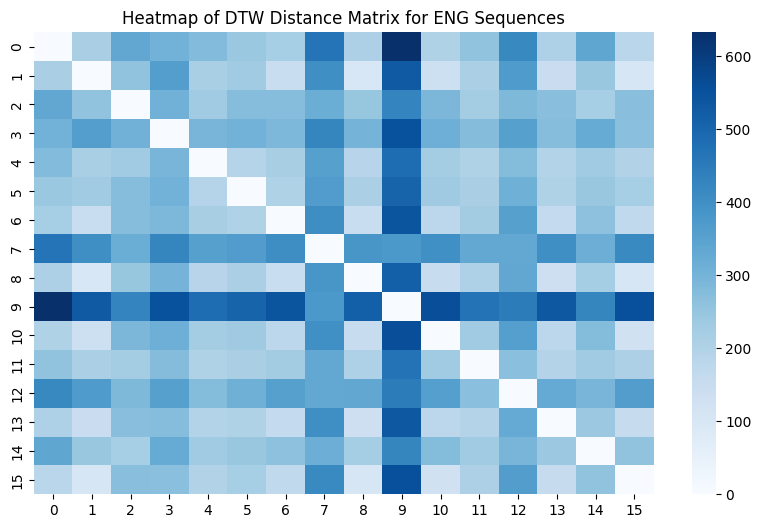

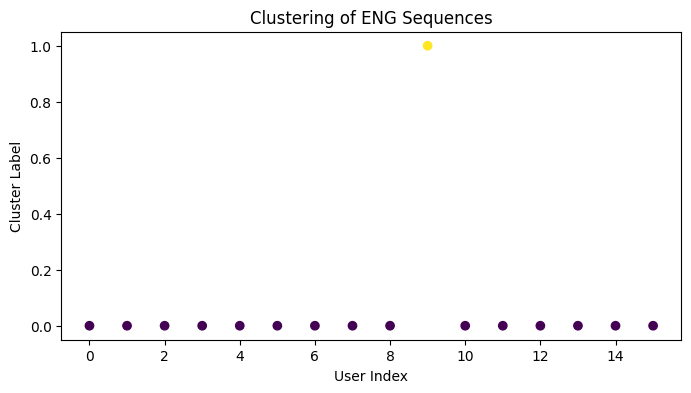

In [99]:
# Step 2: Visualize the clusters
# Create a heatmap for the ENG distance matrix
plt.figure(figsize=(10, 6))
sns.heatmap(distance_matrix_eng1, cmap="Blues", annot=False)
plt.title("Heatmap of DTW Distance Matrix for ENG Sequences")
plt.show()

# Visualize the clusters for ENG sequences
plt.figure(figsize=(8, 4))
plt.scatter(range(len(eng1_sequences)), labels_eng1, c=labels_eng1)
plt.title("Clustering of ENG Sequences")
plt.xlabel("User Index")
plt.ylabel("Cluster Label")
plt.show()


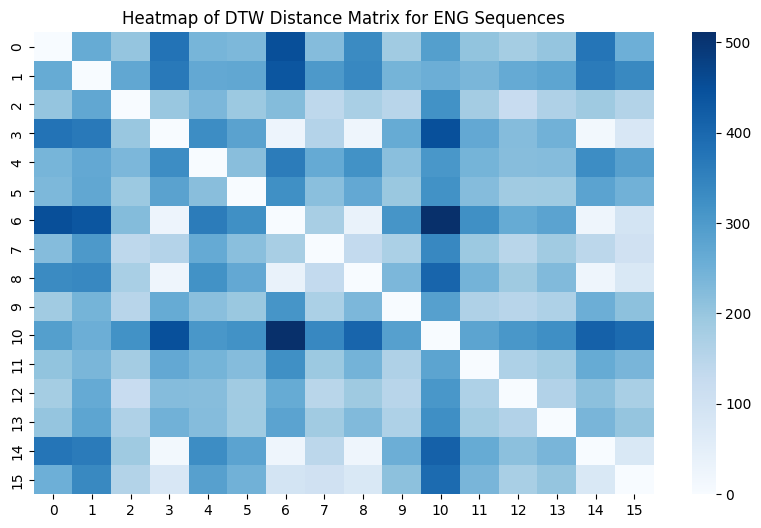

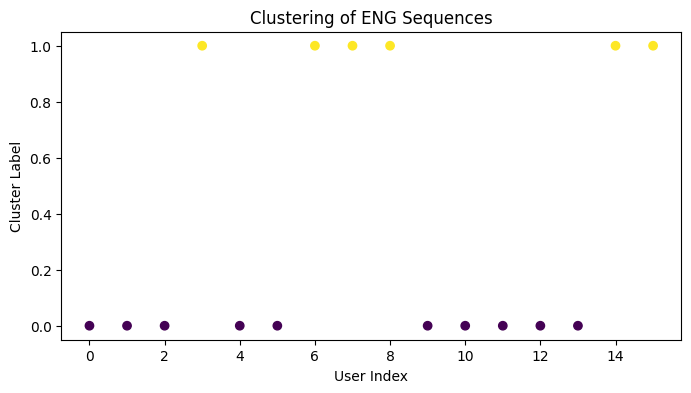

In [100]:
# Step 2: Visualize the clusters
# Create a heatmap for the ENG distance matrix
plt.figure(figsize=(10, 6))
sns.heatmap(distance_matrix_eng2, cmap="Blues", annot=False)
plt.title("Heatmap of DTW Distance Matrix for ENG Sequences")
plt.show()

# Visualize the clusters for ENG sequences
plt.figure(figsize=(8, 4))
plt.scatter(range(len(eng2_sequences)), labels_eng2, c=labels_eng2)
plt.title("Clustering of ENG Sequences")
plt.xlabel("User Index")
plt.ylabel("Cluster Label")
plt.show()


In [111]:
labels_eng1.shape

(16,)

In [114]:
eng1_original = master_list[master_list['task_id_x']=='ENG_1'].drop_duplicates(subset='document_id')
eng1_original['cluster'] = labels_eng1
cluster_summary_eng1 = eng1_original.groupby('cluster')[['donation_data']].mean()
cluster_summary_eng1

,donation_data
cluster,
0,0.76
1,0.50


,donation_data
cluster,
0,0.76
1,0.50


In [115]:
eng2_original = master_list[master_list['task_id_x']=='ENG_2'].drop_duplicates(subset='document_id')
eng2_original['cluster'] = labels_eng2
cluster_summary_eng2 = eng2_original.groupby('cluster')[['donation_data']].mean()
cluster_summary_eng2

,donation_data
cluster,
0,0.990000
1,0.666667
